# CNN 이란? 
- Convolution Neural Networks

# 1. Convolution
- 곱
- 3x3과 7x7을 convolution하면 5x5가 나온다
- convolution 연산이란?
    - 해당 convolution filter의 모양을 이미지에 찍는다.
    - 즉, 같은 이미지에 대해서 convolution 필터를 찍는다. ex) 이미지가 어두워지거나 blur가 되거나, 강조되거나, 외곽선 등등

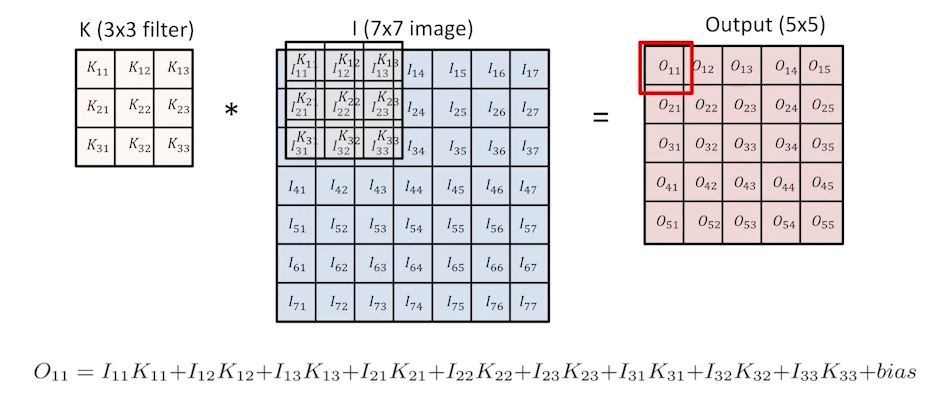

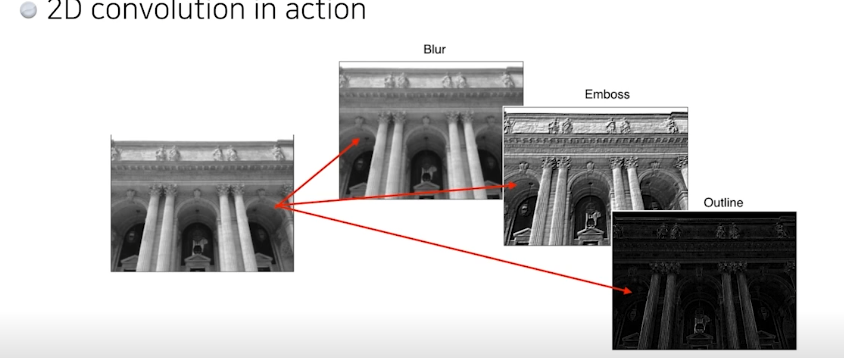

- RGB 이미지를 convolution하면 보통 텐서를 이용한다. 
- RGB라는 3개의 채널이 있음. 3x3 RGB filter를 사용한다면, 32x32 이미지의 output은 28x28x1이 된다.

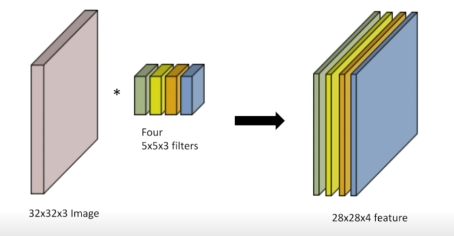

- 이미지에 여러 filter가 들어간다.
- 필터지나면 28x28x1이 되는데 filter가 여러개니까 28x28x4가 된다.
- input채널과 output convolution feature map의 channel를 알면, 적용되는 convolution feature의 크기를 알 수 있다.

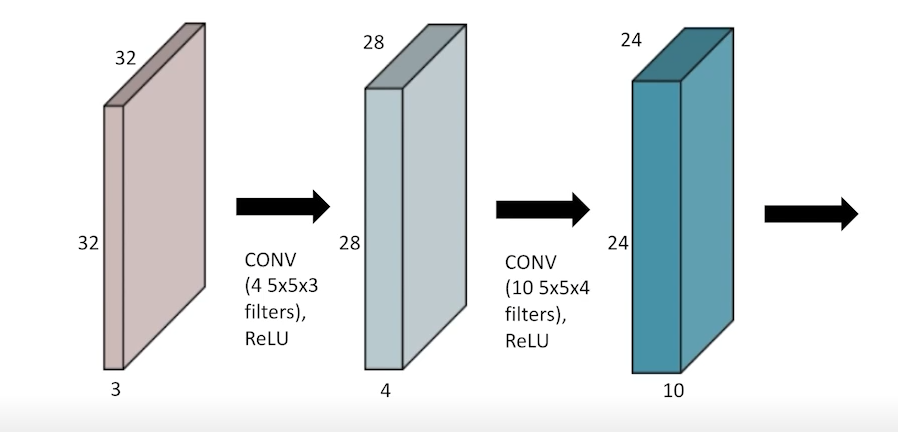

- 이 연산에 필요한 혹은 이 연산을 정의하는데 필요한 파라미터의 숫자가 중요하다.
- 32x32x3 rgb이미지로 28x28x4짜리 convolution feature map을 얻기위해서 필요한 파라미터 수는 5x5x3x4이다.
    - convolution을 때리는 input channel숫자 * output feature map 수

# 2. Convolutional Neural Networks
- CNN
- CNN consists of convolution layer, pooling layer, and fully connected layer.
- pooling layer
    - 이미지에서 유용한 정보를 얻는 feature extreaction
- 요즘은 Full connected layer를 없애는 추세이다.
    - 파라미터 수 떄문에
    - 학습해야하는 파라미터의 수가 늘어날수록 느리고, generalization performance가 떨어진다고 나옴
        - generalization performance: 한번도 없는 테스트 데이터에서 얼마나 잘 동작할지

-> Convolution layer를 가져가지만 파라미터 수를 줄여야함
    - 이를 위해 많은 테크닉이 들어간다.

- 이 layer들의 파라미터가 얼마나 사용되는지 항상 감을 가지고 가는게 좋다

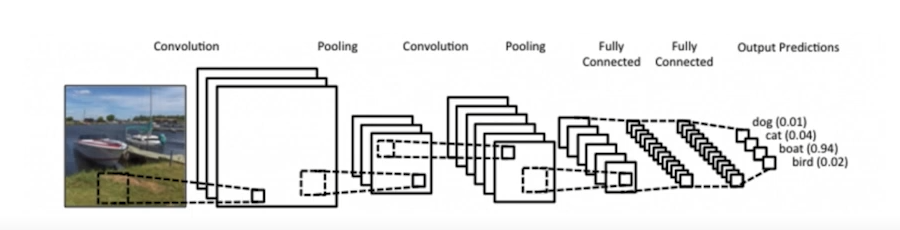

# 3. stride
- 넓게 걷는다
- 내 convolution filter를 얼마나 자주 찍을지


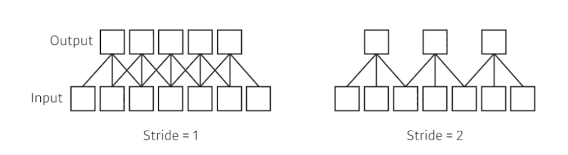

#  4. padding
- 어떤 값을 덧대주는 역할.
- 일반적으로 0
    - 5x5입력에 3x3filter를 적용할 때 가장자리 못찍으니까 input에 zero-padding해서 찍어줌

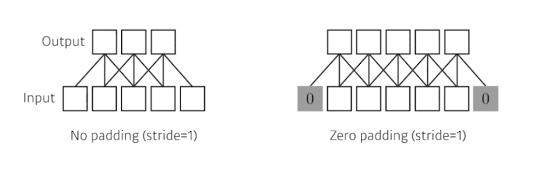

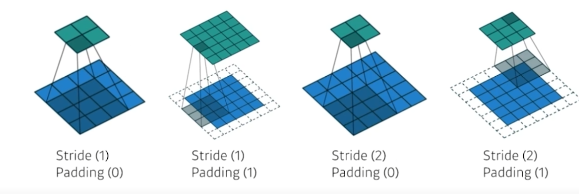

- convolution operation을 할 때 원하는 출력값에 맞춰서 zero-padding과 stride를 줄 수 있다.

# 5. Convolution Arithmetic
- 각각의 kernel의 채널 크기는 input demension이랑 같음

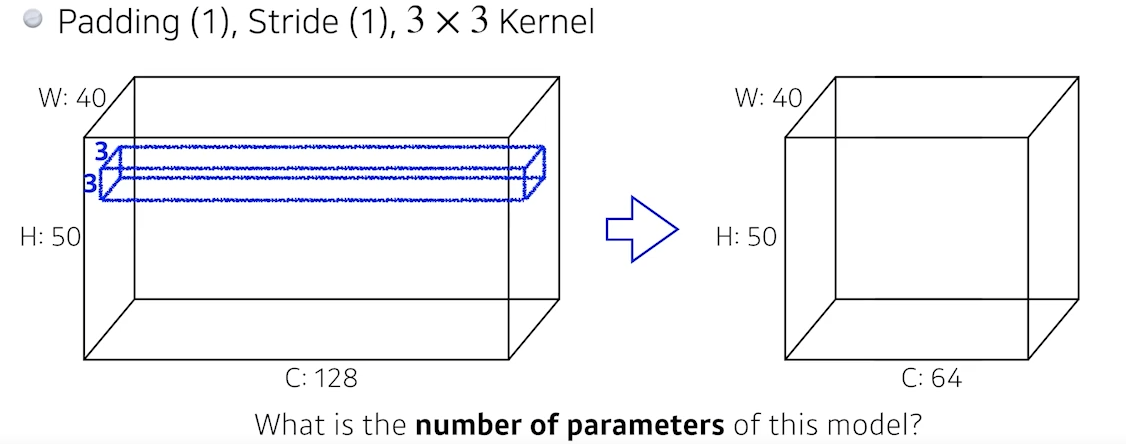

- 40x50그대로고, 3x3 kernel을 이용한다. 하나의 kernel의 적용하면 40x50x1이 되는데 채널수가 64니까 64개의 3x3x128kernel filter를 이용한다는 의미이다.
- 파라미터의 수는 3x3x128x64 = 73728
> 네트워크보면 파라미터 수가 대충 감이 잡혀야한다. 이게 만개인지 10만개인지 이런거.

# 5-1. 연습

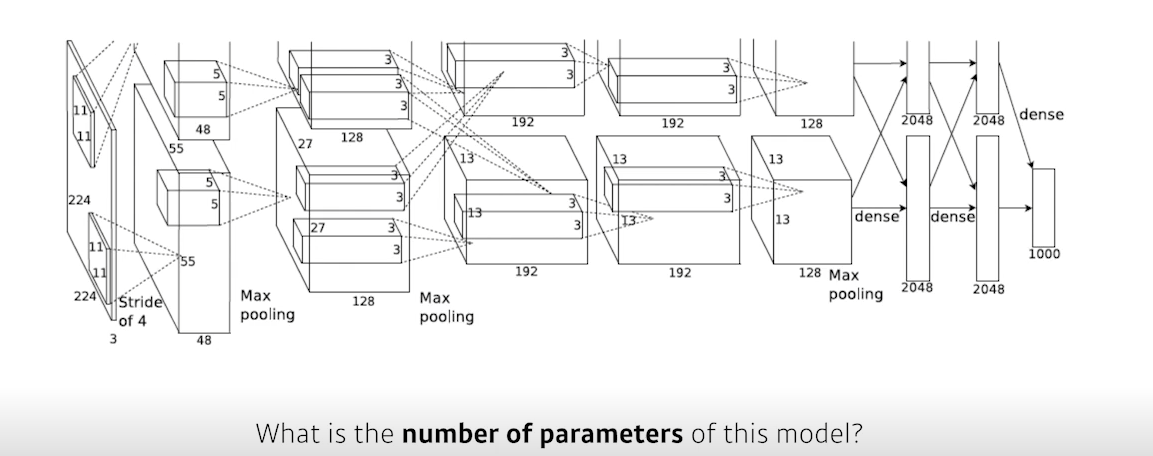

### 알렉스넷(AlexNet)은 이당시 컴퓨터 성능이 좋지 않아서, GPU를 2개에 나눠서 함.

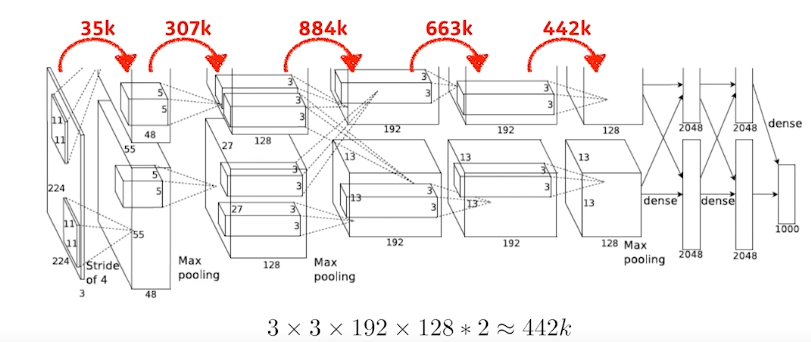

- 224x224x3 이미지네? kernel은 11x11x3이겠네 
- 55x55x48이 나오려면 일단 11x11x3kernel filter가 48개 있다는 이야기임.

-> 11x11x3x48x2 -> 약 35k(35000개)

- 11x11kernel filter가 5x5로 줄어들었네? 5x5x48
- 27x27x128이 나오려면 5x5x48kernel filter가 128개 들어있다는 의미이니까

-> 5x5x48x128x2 -> 약 307k(30만 7천)

- 5x5kernel filter가 3x3로 줄어들었네? 3x3x128
- 13x13x192이 나오려면 3x3x128kernel filter가 192개 들어있다는 의미이니까

-> 3x3x128x2x192x2 -> 약 884k(30만 7천)

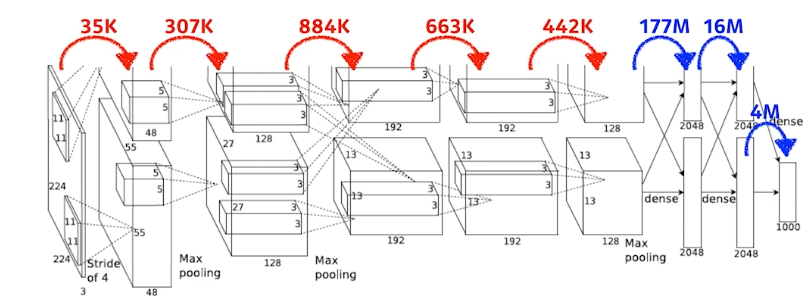

- 13x13이 채널의 값이고, 채널 수는 128, gpu 2개니까 곱하기2, 마지막출력값이 2048이니까 곱하기 2048인데 2개임.

-> 13 x 13 x 128 x 2 x 2048 x 2 = 약 177M

- 이 값들이 엄청커진다.
- <font color="red">빨간색</font>으로 표현된 layer가 <font color="red">convolution layer</font>이고 <font color="blue">파란색</font>으로 표현된 layer가 <font color="blue">dense layer</font>이다.
    - 딱봐도 파라미터의 수가 dense로 넘어갈수록 엄청나게 증가한다.
    - convolutation operator가 각각의 하나의 kernel이 모든 위치에서 동일하게 적용되기 때문이다.
    - 같은 커널이 오른쪽위 왼쪽위 등에 적용되니까?

> ### 대부분의 fully connected layer가 이렇게 되니까 뒷단의  fully connected layer수를 줄이고, 앞단의 convolutaion layer수를 증가시키는게 일반적인 트렌드이다.

#### 그래서 깊이는 점점 깊어지지만 파라미터 수는 점점 줄어들게된다 
#### -> 많이 사용되는 기술이 1x1 convolution이다.

# 6. 1x1 Convolution
- 256 x 256이라는 special demension은 그대로 유지한채 채널을 128->32로 줄인다.
- 더 깊게 쌓으면서 파라미터 수를 줄일 수 있게 된다. ex) bottleneck architecture
- 1x1 convolution을 이용한 테크닉으로 줄일 수 있다

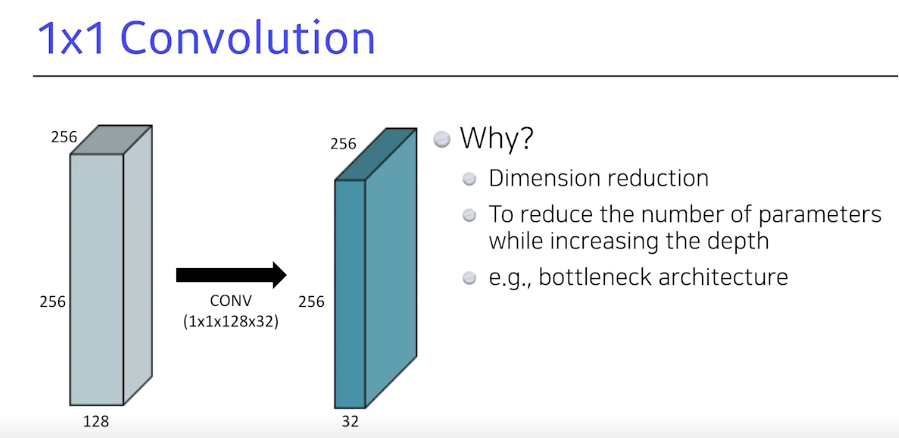